***This nootebook show how to use our three NEW metrics  build for the Cadence Note 2021: Classical variable stars in different Galactic environments: pulsation behaviour recovery (PI Musella).***
***LcContructor.py*** simulate the temporal series  of a pulsating star (RR, Cepheids or LPV, template from Marconi et al. 2005 and Trabucchi et al 2019) using a given distance, reddening and OpSim.This metric  produce  ascii file with the temporal series and useful flags for the saturation  and detection limit  and simulated light curves in each band phased withe the period of the model.

After that a  preliminary and quick analysis of the temporal series is  performed using:

(1) ***Lcperiod.py*** that use Gatspy package (https://arxiv.org/abs/1502.01344) to derive the best period in (interval (period_model- 0.5*period_model,period_model+ 0.5*period_model) ;
(2) and ***LcFitting.py*** to perform the fit of phased light curve  with a given numberOfHarmonics. This metric also compute mean magnitude, ammplitude, chi of the fit in each band  and the dimension of the max distance from two consecutive phases of the light curve in each band and the  number gaps larger than factorForDimensionGap.A new measurement of the sampling is introduced that use the uniformity parameter from  Barry F. Madore and Wendy L. Freedman 2005 ApJ 630 1054

For  more information please read the details in each metric and/or please send an email to: 
(marcella.dicriscienzo@inaf.it, silvio.leccia@inaf.it and vittorio.braga@inaf.it



In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from gatspy import periodic
import LcConstructor
import LcPeriod
import LcFitting


/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/db/opsimDatabase.py:95: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if groupBy is 'default' and tableName==self.defaultTable:
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/db/opsimDatabase.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if groupBy is 'default' and tableName!=self.defaultTable:
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:127: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  (key is not 'bins') & (key is not 'binCol'):
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:127: SyntaxWarning: "is not" with a literal. Did yo

Version of db :FBS
Querying database SummaryAllProps with constraint night between 0 and 1461 for columns ['airmass', 'fieldRA', 'observationStartMJD', 'skyBrightness', 'filter', 'seeingFwhmEff', 'night', 'fieldDec', 'numExposures', 'visitExposureTime', 'fiveSigmaDepth']
Found 891851 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
124 Observations total at this sky position (All SNR levels)
Useful (at all S/N and NOT saturated)  Nvisits in ugrizy bands
18 18 19 19 19 31
Period of the model:
0.9799699999999999


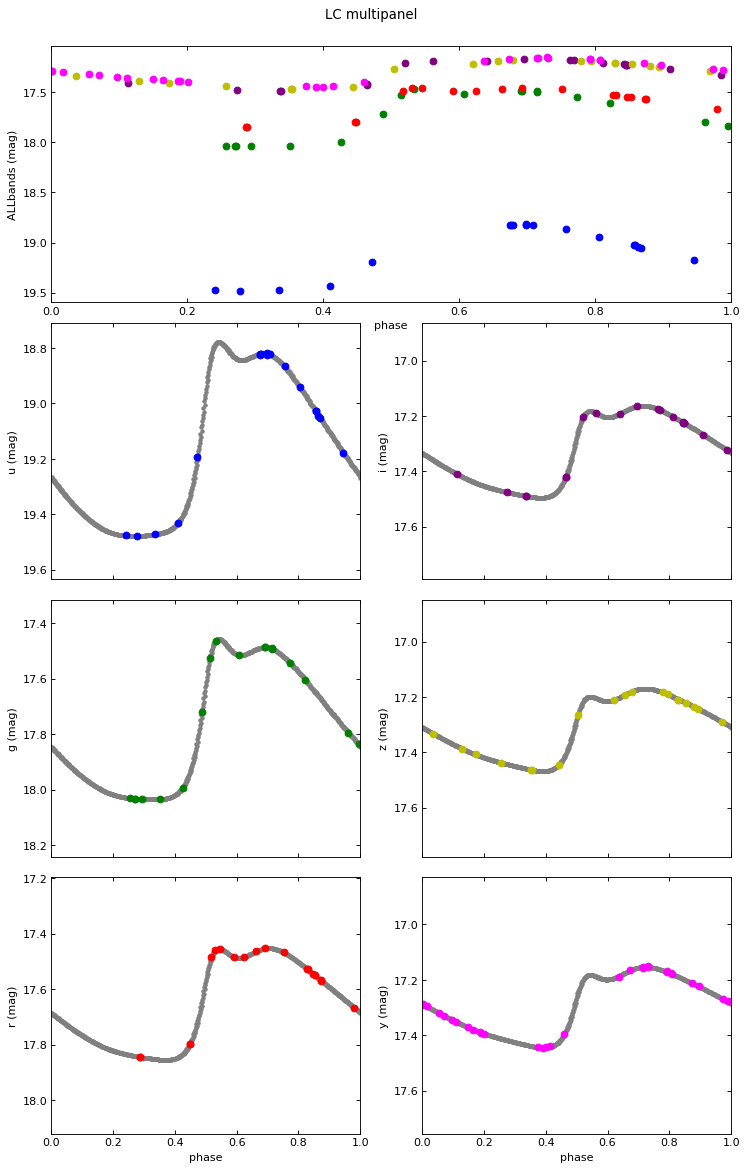

In [2]:

#This cell simulate the temporal series  of a pulsating star  at a given distance
#and reddening and a specific OpSim with LcContructor.py. 
#the output is an  ascii file with the temporal series and useful flags for the saturation
#(computed with saturation_stacker)and detection limit(s/n<5)
#and a multipanel plot with the light curves (phased using the model's period)

#Let's start!
#Insert Ra and Dec of your observations--->
ra=72.000005
dec=-70.933132
#Insert Distance modulus and E(B-V) of the target--->
dm=18.5
ebv=0.08
#Insert Opsim (see in /sims_maf/ for all the available simulations)--->
runName='baseline_v1.5_10yrs.db'
path='/sims_maf/fbs_1.5/baseline/baseline_v1.5_10yrs.db'
#runName='footprint_add_mag_cloudsv1.5_10yrs.db'
#path='/sims_maf/fbs_1.5/footprints/footprint_add_mag_cloudsv1.5_10yrs.db'

#Insert start year and finish year of the survey--->
start=0
finish=4
#Insert the template of  variable star (Choose for example RRab.csv,RRc.csv,CEF1.csv,CEF2.csv,LPV1.csv,LPV2.csv)--->
path_ID='./'
modelName='CEF1'
modelFileName=modelName+'.csv'
path2=path_ID+modelFileName

#Insert the sigma for the noising--->
sigma_noise=1
#Insert path where figure will be stored if figure=True  (build the directory first)--->
path3='FIGURE/'
figure=True
#Insert path where sciifiles will be stored if ascii=True  (build the directory first--->
path4='FILES/'
optionFile=True
#If this parameter is true the saturated points will be eliminated in the plot (don't change!)
do_remove_saturated=True

label=str(modelName)+'_'+('ra{0:06.2f}dec{1:+06.2f}dm'.format(ra,dec))+str(dm)+'ebv'+str(ebv)+'y'+str(start)+'y'+str(finish)+'_'+str(runName)

#Use LcConstructor.py 
LcTeoLSST,LcTeoLSST_noised,LcTheoric,mv,index_notsaturated=LcConstructor.main(ra,dec,dm,ebv,runName,path,start,finish,path2,sigma_noise,path3,figure,path4,optionFile,modelName,do_remove_saturated,label)
period_model=LcTeoLSST['period']
print('Period of the model:' )
print(period_model)

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/gatspy/periodic/lomb_scargle_fast.py:445: UserWarning: The score() method defaults to a slower O[N^2] algorithm.
Use the score_frequency_grid() method to access the fast FFT-based algorithm.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("The score() method defaults to a slower O[N^2] "


Noise level (median vs mean)
0.06605180644987341 0.08829224472577178
Finding optimal frequency:
 - Estimated peak width = 0.00529
 - Using 5 steps per peak; omega_step = 0.00106
 - User-specified period range:  0.49 to 1.5
 - Computing periods at 8075 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
 Period of the model:
0.9799699999999999
 Period found by Gatpy:
0.9799430739053393
 DeltaP/P (in perc):
-2.6926094660595368e-05
 DeltaP/P*1/number of cycle:
2.268927843400468e-08


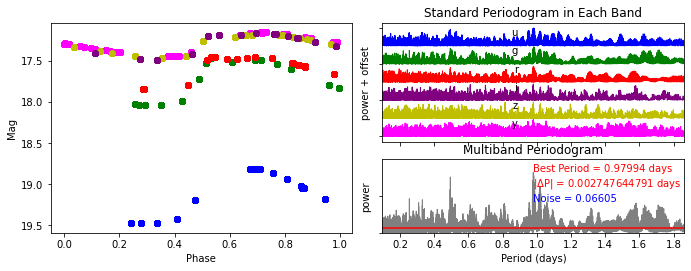

In [3]:
#This cell derive the  period and the noise of Multiband periodogram from simulated light curve with MultibandLombscargle option of Gatspy
#and build a figure that compare  Lombscargle in each band with multiband analysis.

#period range in the periodogram for the plot of the periodogram 
minper_plot=period_model-0.9*period_model
maxper_plot=period_model+ 0.9*period_model
#Step's choice
periods = np.linspace(minper_plot, maxper_plot,10000)
#period range for the optimization of the period's search with LombScargleMultiband
minper_opt=period_model- 0.5*period_model
maxper_opt=period_model+0.5*period_model


#Use Lcfitting.py
best_per_temp,diffper,diffper_abs=LcPeriod.main(mv,LcTeoLSST,LcTeoLSST_noised,
            index_notsaturated,label,path3)



fitting...
fitting u band
fitting g band
fitting r band
fitting i band
fitting z band
fitting y band
Final results:
<u>,<g>,<r>,<i>,<z>,<y>,=
19.152689882871552 17.741471480177722 17.6299704393382 17.317249451703677 17.31129828260107 17.30079052896764
<Au>,<Ag>,<Ar>,<Ai>,<Az>,<Ay>,=
0.6763099481613892 0.6248063733515892 0.4388700761453812 0.3507066435695698 0.29766006050929406 0.2993259428068704
Chi of the fit=
1.4499810105912314e-05 0.00023765460622817068 0.00012898969904485752 6.258159027500936e-05 3.054634095042081e-05 9.379070469545794e-07
Uniformity parameter ( from Madore, Freedman 2005)  =
0.885294336239455 1.0040317889579082 0.8944850896018348 0.9653651786164139 0.9832247739127716 0.9370820933595214


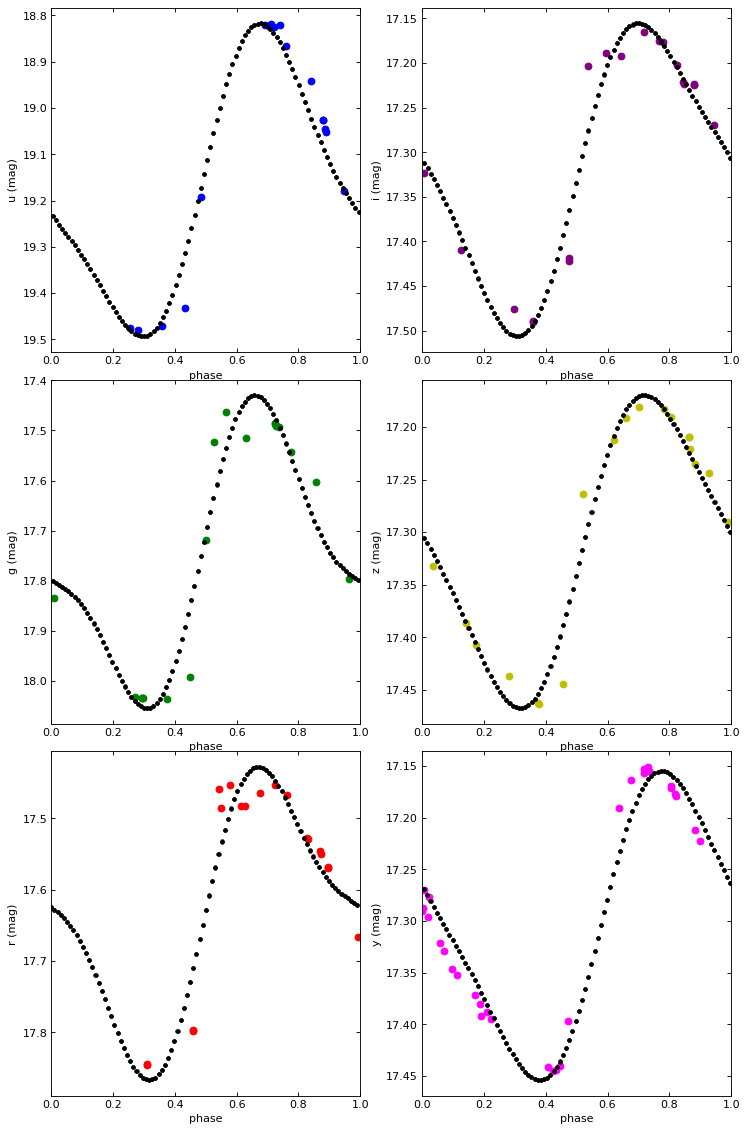

In [4]:
#This cell make the analysis of light curve phased with the recovered period and 
#with index=index_notsaturated with a given period 

#You can  change the period and use:
#Period that phase the light curve.(use LcTheoric['time'][0] as zero point as in the previous figures)
period=best_per_temp #or period_model or fitLS_multi.best_period

#Insert the number of harmonics of the model's fit (if NVisits =2*numberOfHarmonics+2 the metric skip to other band without doing  the fit)
numberOfHarmonics=2
#The  value that multiplyes the max distance from two consecutive phases of the light curve (used to count the gaps in  the LC)
factorForDimensionGap=0.5 
outDir=path3


#Use of LcFitting!

finalResult=LcFitting.computation(LcTeoLSST_noised,index_notsaturated,period,numberOfHarmonics,factorForDimensionGap,label,outDir)

#...and is useful to have all these information!!
print('Final results:')
print('<u>,<g>,<r>,<i>,<z>,<y>,=')
print(finalResult['mean_u'],finalResult['mean_g'],finalResult['mean_r'],finalResult['mean_i'],finalResult['mean_z'],finalResult['mean_y'])
print('<Au>,<Ag>,<Ar>,<Ai>,<Az>,<Ay>,=')
print(finalResult['ampl_u'],finalResult['ampl_g'],finalResult['ampl_r'],finalResult['ampl_i'],finalResult['ampl_z'],finalResult['ampl_y'])
print('Chi of the fit=')
print(finalResult['chi_u'],finalResult['chi_g'],finalResult['chi_r'],finalResult['chi_i'],finalResult['chi_z'],finalResult['chi_y'])

#print('Max gap dimension (MGD)=')
#print(finalResult['maxHoleDimension_u'],finalResult['maxHoleDimension_g'],finalResult['maxHoleDimension_r'],finalResult['maxHoleDimension_i'],finalResult['maxHoleDimension_z'],finalResult['maxHoleDimension_y'])
#print('Number of gaps >'+ str(factorForDimensionGap)+'MGD =')
#print(finalResult['numberOfHoles_u'],finalResult['numberOfHoles_g'],finalResult['numberOfHoles_r'],finalResult['numberOfHoles_i'],finalResult['numberOfHoles_z'],finalResult['numberOfHoles_y'])
print('Uniformity parameter ( from Madore, Freedman 2005)  =')
print(finalResult['uniformity_u'],finalResult['uniformity_g'],finalResult['uniformity_r'],finalResult['uniformity_i'],finalResult['uniformity_z'],finalResult['uniformity_y'])